# ML - Multiple Linear Regression Model (Part I).
- Prepared by - Sagun Shakya.
    - MSc. Data Science.
    - GITAM Institute of Science, Visakhapatnam.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
d = dict()

In [3]:
# Adding the data values.
d['area'] = np.array([26,30,32,36,40])*100
d['bedrooms'] = np.array([3,4,np.NaN,3,5])
d['age'] = np.array([20,15,18,30,8])
d['price'] = np.array([55,56.5,61,59.5,76]) * 10000

In [4]:
print(d)

{'area': array([2600, 3000, 3200, 3600, 4000]), 'bedrooms': array([ 3.,  4., nan,  3.,  5.]), 'age': array([20, 15, 18, 30,  8]), 'price': array([550000., 565000., 610000., 595000., 760000.])}


In [5]:
house = pd.DataFrame(d)
house

,area,bedrooms,age,price
0,2600,3.0,20,550000.0
1,3000,4.0,15,565000.0
2,3200,NaN,18,610000.0
3,3600,3.0,30,595000.0
4,4000,5.0,8,760000.0


In [6]:
# Imputing the missing value using the median.
median_bedroom = house['bedrooms'].median()

house['bedrooms'] = house['bedrooms'].fillna(value = np.floor(median_bedroom), axis = 0 )

In [7]:
house.describe()

,area,bedrooms,age,price
count,5.000000,5.000000,5.00000,5.000000
mean,3280.000000,3.600000,18.20000,616000.000000
std,540.370243,0.894427,8.01249,83919.604384
min,2600.000000,3.000000,8.00000,550000.000000
25%,3000.000000,3.000000,15.00000,565000.000000
50%,3200.000000,3.000000,18.00000,595000.000000
75%,3600.000000,4.000000,20.00000,610000.000000
max,4000.000000,5.000000,30.00000,760000.000000


In [8]:
house.corr()

,area,bedrooms,age,price
area,1.000000,0.600014,-0.224033,0.863330
bedrooms,0.600014,1.000000,-0.823265,0.789369
age,-0.224033,-0.823265,1.000000,-0.621277
price,0.863330,0.789369,-0.621277,1.000000


### Creating a heatmap.

#### Description of the figure:
- Red cells indicate positive correlation.
- Blue cells indicate negative correlation.
- White cells indicate no correlation. 
- The darker the colors, the stronger the correlation (positive or negative) between those two variables as indicated by
  cmap = 'coolwarm'.


In [9]:
columns_val = house.corr().columns.values
columns_val

array(['area', 'bedrooms', 'age', 'price'], dtype=object)

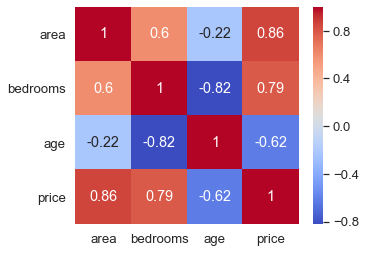

In [10]:
plt.figure(figsize = (5,4))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(data=house.corr(), xticklabels=columns_val, yticklabels=columns_val, cmap = 'coolwarm', annot = True)
plt.show()


<Figure size 720x576 with 0 Axes>

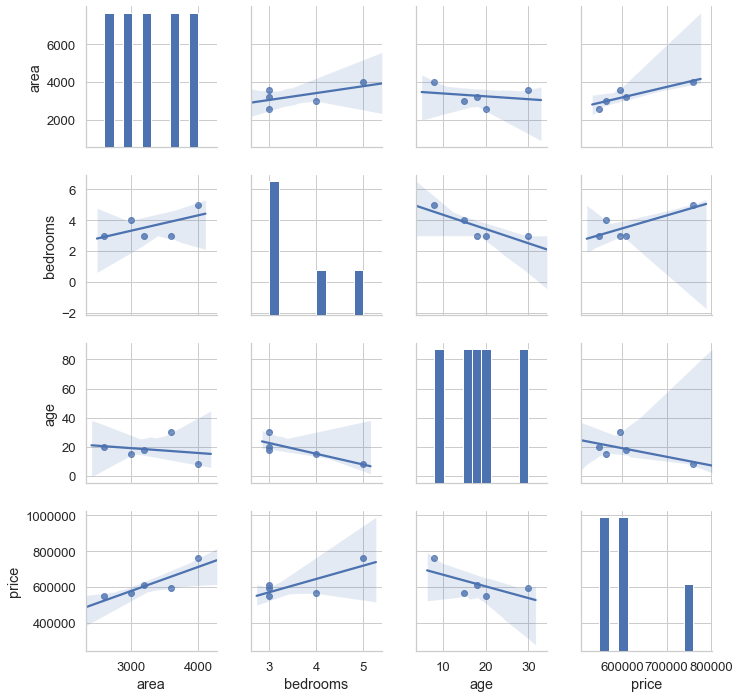

In [11]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 


sns.pairplot(house, kind = 'reg', palette = 'Set3')
plt.show()

### Multiple Regression Analysis.

In [12]:
model = LinearRegression()

In [13]:
house.drop('price', axis = 1)

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,3.0,18
3,3600,3.0,30
4,4000,5.0,8


In [14]:
model.fit(house.drop('price', axis = 1), house.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print('Weight values: ', model.coef_, '\nIntercept: ', model.intercept_)

Weight values:  [   137.25 -26025.    -6825.  ] 
Intercept:  383724.9999999998


In [16]:
model.predict([[5000, 7, 10]])

array([819550.])

In [17]:
model.predict([[5000, 7, 10], [3020,4,6], [6500,5,6]])

array([ 819550.,  653170., 1104775.])

# Exercise:
 - URL: https://github.com/codebasics/py/blob/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv

### Problem Statement:
#### This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates:

 - 2 yr experience, 9 test score, 6 interview score.

 - 12 yr experience, 10 test score, 10 interview score.


In [18]:
hrData = pd.read_csv('D:\Sagun Shakya\Python\Data Sets\hiring.csv')
hrData

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [19]:
import copy

hrData1 = copy.deepcopy(hrData)

In [20]:
# Renaming columns to more appropriate ones.

hrData = hrData.rename(columns = {'test_score(out of 10)':'test_score',
                         'interview_score(out of 10)':'interview_score',
                         'salary($)':'salary'})

In [21]:
hrData

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
#Imputing the missing values with zeros.

hrData['test_score'] = hrData['test_score'].fillna(value = 0)
hrData['experience'] = hrData['experience'].fillna(value = 'zero')

In [23]:
hrData.head(2)

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000


### Replacing all the words to numbers using two approaches:
- Using map() function.
- Using Python package called word2number.

### Using map() function:

In [25]:
mappings = dict()
numbers = ['one','two','three','four','five','six','seven','eight','nine','ten','eleven']

for ii in range(1,12):
    mappings[numbers[ii-1]] = ii
    
print(mappings)

{'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11}


In [26]:
hrData.experience = hrData.experience.map(mappings)

In [27]:
hrData

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,0.0,7,72000
7,11.0,7.0,8,80000


In [28]:
hrData['experience'] = hrData['experience'].fillna(value = 0)

### Using the package:

In [32]:
from word2number.w2n import word_to_num

hrData1['experience'] = hrData1['experience'].fillna(value = 'zero')


In [39]:
for ii in range(len(hrData1['experience'])):
    hrData1['experience'][ii] = word_to_num(hrData1['experience'][ii])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
hrData1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


- We shall work on hrData rather tha hrData1 as the former has been cleaned. 

In [43]:
hrData


,experience,test_score,interview_score,salary
0,0.0,8.0,9,50000
1,0.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,0.0,7,72000
7,11.0,7.0,8,80000


### Checking for inter - relation between the features.

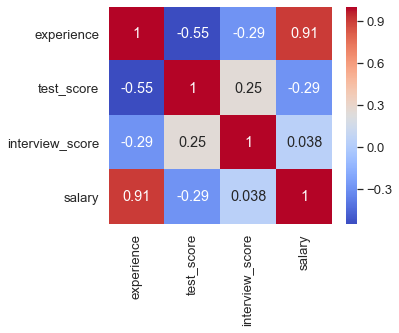

In [47]:
col_vals = hrData.corr().columns.values

plt.figure(figsize = (5,4))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.heatmap(data=hrData.corr(), xticklabels=col_vals, yticklabels=col_vals, cmap = 'coolwarm', annot = True)
plt.show()

## Multiple Regression Model:

In [44]:
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

In [52]:
newModel = LinearRegression()

In [53]:
# Fitting the Multiple regression model.
newModel.fit(hrData.drop('salary', axis = 1), hrData.salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Checking the weights and intercepts values.
print('Weight values: ', newModel.coef_, '\nIntercept: ', newModel.intercept_)

Weight values:  [3077.8642085   999.7856246  2118.48834717] 
Intercept:  24823.52310660579


#### Salary Preiction for the following feature instances:
- 2 yr experience, 9 test score, 6 interview score.

- 12 yr experience, 10 test score, 10 interview score.

In [55]:
myArr = np.array([[2,9,6] , [12,10,10]])
newModel.predict(myArr)

array([52688.25222797, 92940.63332619])

# The End.